In [111]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Mar 3

@author: yaning
"""

import importlib
import numpy as np
import matplotlib.pyplot as plt
import pickle
import math

# my own class files
import threshold.Receptors as Receptors
import threshold.Network as Network
import threshold.create_update_synapse as cus


importlib.reload(Receptors)
importlib.reload(Network)
importlib.reload(cus)

path = "/home/yaning/Documents/Spiking_NN/threshold/"
np.set_printoptions(threshold=np.inf)

In [112]:
pointCount = 6000
deltaTms = 0.05
times = np.arange(pointCount) * deltaTms
initial_Vm = 1.3458754117369027

In [113]:
# instead of using control i write those two functions :(have to copy it everytime i run)

def sigmoid(x):
    return 1 / (1 + math.exp(-x))


In [114]:
neuron_input = Network.Neuron(deltaTms, 0, initial_Vm, "input")
neuron_output = Network.Neuron(deltaTms, 0, initial_Vm, "output")

In [115]:
cus.all_synapses

[]

In [116]:
cus.create_synapse(neuron_input, neuron_output, "AMPA")

In [117]:
neurons = [neuron_input, neuron_output]

In [118]:
for neuron in neurons:
    neuron.erase(initial_Vm)

In [119]:
voltages = []
ion_c = []
receptor_c = []
fire_states = []

for t in range(pointCount):
    if t >= 1500 and t < 5000:
        neuron_input.sending_signal()
        neuron_input.fire_tstep.append(t)
    Ireceptor, Ina = neuron_output.update()
    fire_states.append(neuron_output.fire_state)
    cus.all_synapses[0].state = 0
    voltages.append(neuron_output.Vm - 70)

    receptor_c.append(Ireceptor)
    ion_c.append(Ina)

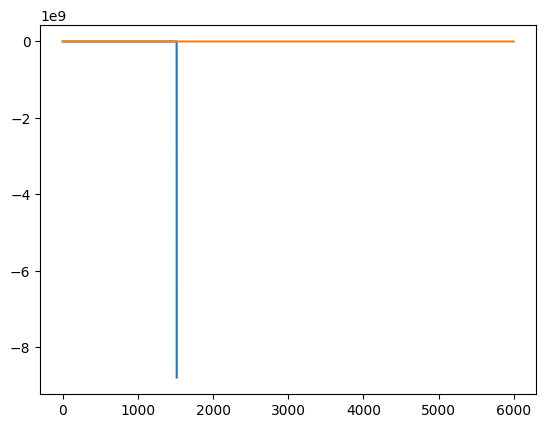

In [120]:
plt.plot(np.arange(6000), voltages)
plt.plot(np.arange(6000), fire_states)
# plt.savefig('plots/threshold_small_nump.png', dpi=300)

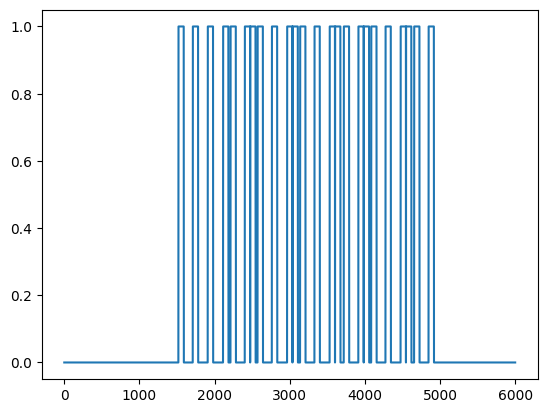

In [141]:
plt.plot(np.arange(6000), fire_states)

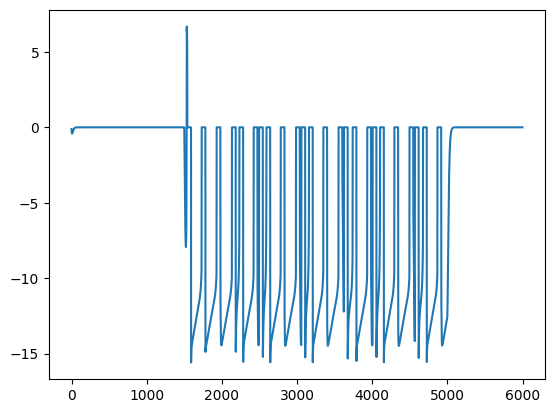

In [142]:
plt.plot(np.arange(6000), receptor_c)

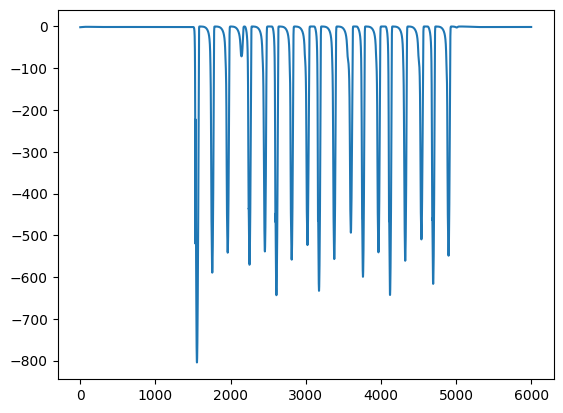

In [143]:
plt.plot(np.arange(6000), ion_c)